In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.decomposition import PCA
%matplotlib inline


In [2]:
df = pd.read_excel("Topics_stars10000_project_keyword.xlsx")
df.head(30)

,project_name,topic_keyword
0,freeCodeCamp/freeCodeCamp,"['react', 'nodejs', 'javascript', 'd3', 'teach..."
1,996icu/996.ICU,[]
2,EbookFoundation/free-programming-books,"['education', 'list', 'books', 'resource', 'ha..."
3,jwasham/coding-interview-university,"['computer-science', 'algorithm', 'algorithms'..."
4,vuejs/vue,"['javascript', 'framework', 'vue', 'frontend']"
5,facebook/react,"['react', 'javascript', 'library', 'ui', 'fron..."
6,kamranahmedse/developer-roadmap,"['computer-science', 'engineering', 'roadmap',..."
7,sindresorhus/awesome,"['lists', 'awesome', 'unicorns', 'resources', ..."
8,tensorflow/tensorflow,"['python', 'machine-learning', 'deep-neural-ne..."
9,twbs/bootstrap,"['javascript', 'css', 'html', 'sass', 'bootstr..."


In [3]:
result = []
topic_dic = {}
for idx,j in enumerate(df['topic_keyword']):
    i_list = j.replace("[","").replace("]","").replace("'","").split(",")
    i_list = [i.strip() for i in i_list]
    df['topic_keyword'][idx] = i_list
    for i in i_list:
        i=i.strip()
        if len(i)==0:
            continue
        if i not in topic_dic:
            topic_dic[i] = 1
        else:
            topic_dic[i] +=1
topic_dic = sorted(topic_dic.items(), key=lambda x: x[1], reverse=True)
# 218번 index 까지 5번 나오는 topic 임
# 몇번까지 나오는것을 feature로 사용할 것인지?
num_of_word = 5
end_index = 0
for idx,item in enumerate(topic_dic):
    if item[1] < num_of_word:
        end_index = idx - 1
        break
topic_list = [i[0] for i in topic_dic[0:end_index]]
topic_dic

[('javascript', 153),
 ('python', 85),
 ('hacktoberfest', 79),
 ('react', 67),
 ('go', 49),
 ('nodejs', 48),
 ('java', 44),
 ('awesome', 43),
 ('android', 41),
 ('machine-learning', 39),
 ('awesome-list', 35),
 ('css', 34),
 ('vue', 33),
 ('deep-learning', 33),
 ('typescript', 33),
 ('framework', 29),
 ('macos', 27),
 ('golang', 26),
 ('html', 25),
 ('ios', 25),
 ('windows', 24),
 ('terminal', 23),
 ('linux', 22),
 ('cli', 22),
 ('list', 21),
 ('web', 21),
 ('docker', 21),
 ('electron', 20),
 ('database', 20),
 ('api', 18),
 ('shell', 18),
 ('swift', 17),
 ('react-native', 17),
 ('interview', 16),
 ('ui', 16),
 ('interview-questions', 16),
 ('kubernetes', 16),
 ('computer-science', 15),
 ('algorithm', 15),
 ('tensorflow', 15),
 ('material-design', 15),
 ('c', 15),
 ('graphql', 15),
 ('security', 15),
 ('mysql', 14),
 ('node', 14),
 ('rust', 14),
 ('algorithms', 13),
 ('es6', 13),
 ('command-line', 13),
 ('compiler', 13),
 ('webpack', 13),
 ('php', 13),
 ('json', 13),
 ('ruby', 13),
 ('

In [4]:
ml_list = ['machinelearning','machinelearning-python','ml']
p_list =['package','packages','package-manager','packaging']

In [5]:
df_vector = pd.DataFrame(topic_list).transpose()
df_vector

,0,1,2,3,4,5,6,7,8,9,...,202,203,204,205,206,207,208,209,210,211
0,javascript,python,hacktoberfest,react,go,nodejs,java,awesome,android,machine-learning,...,vpn,websocket,jupyter-notebook,bittorrent,cache,cheatsheet,dropbox,hooks,linter,keras


In [6]:
topic_dic_df = {}
for i in topic_list:
    topic_dic_df[i]=0
topic_list

['javascript',
 'python',
 'hacktoberfest',
 'react',
 'go',
 'nodejs',
 'java',
 'awesome',
 'android',
 'machine-learning',
 'awesome-list',
 'css',
 'vue',
 'deep-learning',
 'typescript',
 'framework',
 'macos',
 'golang',
 'html',
 'ios',
 'windows',
 'terminal',
 'linux',
 'cli',
 'list',
 'web',
 'docker',
 'electron',
 'database',
 'api',
 'shell',
 'swift',
 'react-native',
 'interview',
 'ui',
 'interview-questions',
 'kubernetes',
 'computer-science',
 'algorithm',
 'tensorflow',
 'material-design',
 'c',
 'graphql',
 'security',
 'mysql',
 'node',
 'rust',
 'algorithms',
 'es6',
 'command-line',
 'compiler',
 'webpack',
 'php',
 'json',
 'ruby',
 'programming',
 'bash',
 'dashboard',
 'devops',
 'monitoring',
 'git',
 'editor',
 'spring',
 'c-plus-plus',
 'angular',
 'animation',
 'microservices',
 'spring-boot',
 'redux',
 'data-science',
 'vim',
 'frontend',
 'mobile',
 'svg',
 'documentation',
 'testing',
 'rest',
 'tutorial',
 'http',
 'cross-platform',
 'wechat',
 'pos

In [7]:
df_vector = pd.DataFrame(result,index=df['project_name'],columns=topic_list).fillna(0)
df_vector

,javascript,python,hacktoberfest,react,go,nodejs,java,awesome,android,machine-learning,...,vpn,websocket,jupyter-notebook,bittorrent,cache,cheatsheet,dropbox,hooks,linter,keras
project_name,,,,,,,,,,,,,,,,,,,,,
freeCodeCamp/freeCodeCamp,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996icu/996.ICU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EbookFoundation/free-programming-books,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
jwasham/coding-interview-university,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
vuejs/vue,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
visionmedia/superagent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
charlax/professional-programming,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
oracle/graal,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
for idx,topics in enumerate(df['topic_keyword']):
    for topic in topics:
        if topic in topic_list:
            df_vector.loc[df['project_name'][idx],topic] = 1
df_vector

,javascript,python,hacktoberfest,react,go,nodejs,java,awesome,android,machine-learning,...,vpn,websocket,jupyter-notebook,bittorrent,cache,cheatsheet,dropbox,hooks,linter,keras
project_name,,,,,,,,,,,,,,,,,,,,,
freeCodeCamp/freeCodeCamp,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996icu/996.ICU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EbookFoundation/free-programming-books,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
jwasham/coding-interview-university,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
vuejs/vue,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
visionmedia/superagent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
charlax/professional-programming,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
oracle/graal,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df_vector.to_excel("packages_vectors.xlsx",index=False)

In [10]:
# 상관행렬을 이용하기 위한 표준화계수로 만들기 위해 scaling
# 선 PCA를 수행해주기 전에 변수들의 단위를 표준화시켜주어야 한다. 즉, PCA 수행 시 상관행렬을 이용해 표준화계수로 만들어준 후 PCA를 수행.
# from sklearn.preprocessing import StandardScaler

# std_df = StandardScaler().fit_transform(df_vector)
# std_df = pd.DataFrame(std_df, index=df_vector.index, columns=df_vector.columns)
# df_vector = std_df
# df_vector.head()

In [11]:
df_vector.shape

(1000, 212)

In [12]:
# 모든 독립변수 개수(212개)만큼 주성분 개수 설정해서 분석하기
pca = PCA(n_components=153)
df_pca = pca.fit_transform(df_vector)
df_pca = pd.DataFrame(df_pca, index=df_vector.index,
                      columns=[f"pca{num+1}" for num in range(df_pca.shape[1])])
df_pca.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca144,pca145,pca146,pca147,pca148,pca149,pca150,pca151,pca152,pca153
project_name,,,,,,,,,,,,,,,,,,,,,
freeCodeCamp/freeCodeCamp,1.210775,0.106974,0.012635,0.143893,0.224673,0.060492,-0.349272,0.122543,-0.306461,-0.361738,...,0.012189,0.041516,-0.010254,0.001017,-0.032682,-0.039537,0.008407,-0.006279,-0.062714,-0.023382
996icu/996.ICU,-0.161894,-0.114771,-0.060096,-0.120787,-0.034542,0.009631,-0.018483,-0.089426,-0.040670,0.020835,...,-0.001578,0.001137,-0.001950,0.000962,-0.004775,-0.004156,-0.000498,-0.001860,0.003031,-0.005449
EbookFoundation/free-programming-books,-0.108576,-0.086294,0.642277,0.520239,-0.154948,-0.068523,0.138540,-0.426992,-0.104871,0.018982,...,0.026273,-0.016659,0.003893,0.055273,0.041768,-0.016276,0.115432,-0.045407,-0.056714,0.045588
jwasham/coding-interview-university,-0.159393,0.061958,-0.124721,-0.071381,-0.109227,-0.483028,0.256569,0.500802,-0.755656,-0.166071,...,0.101437,-0.030145,0.024503,0.100080,0.086031,-0.162722,0.051534,0.010791,0.018943,0.031869
vuejs/vue,0.905285,0.104327,-0.121438,-0.146116,-0.030025,-0.185561,0.183709,-0.011238,0.327003,0.185877,...,0.010095,0.102224,0.017183,-0.044297,-0.053002,-0.036012,-0.076353,-0.067492,-0.042809,-0.058730


In [13]:
df_pca.shape

(1000, 153)

In [14]:
df_pca

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca144,pca145,pca146,pca147,pca148,pca149,pca150,pca151,pca152,pca153
project_name,,,,,,,,,,,,,,,,,,,,,
freeCodeCamp/freeCodeCamp,1.210775,0.106974,0.012635,0.143893,0.224673,0.060492,-0.349272,0.122543,-0.306461,-0.361738,...,0.012189,0.041516,-0.010254,0.001017,-0.032682,-0.039537,0.008407,-0.006279,-0.062714,-0.023382
996icu/996.ICU,-0.161894,-0.114771,-0.060096,-0.120787,-0.034542,0.009631,-0.018483,-0.089426,-0.040670,0.020835,...,-0.001578,0.001137,-0.001950,0.000962,-0.004775,-0.004156,-0.000498,-0.001860,0.003031,-0.005449
EbookFoundation/free-programming-books,-0.108576,-0.086294,0.642277,0.520239,-0.154948,-0.068523,0.138540,-0.426992,-0.104871,0.018982,...,0.026273,-0.016659,0.003893,0.055273,0.041768,-0.016276,0.115432,-0.045407,-0.056714,0.045588
jwasham/coding-interview-university,-0.159393,0.061958,-0.124721,-0.071381,-0.109227,-0.483028,0.256569,0.500802,-0.755656,-0.166071,...,0.101437,-0.030145,0.024503,0.100080,0.086031,-0.162722,0.051534,0.010791,0.018943,0.031869
vuejs/vue,0.905285,0.104327,-0.121438,-0.146116,-0.030025,-0.185561,0.183709,-0.011238,0.327003,0.185877,...,0.010095,0.102224,0.017183,-0.044297,-0.053002,-0.036012,-0.076353,-0.067492,-0.042809,-0.058730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
visionmedia/superagent,-0.161894,-0.114771,-0.060096,-0.120787,-0.034542,0.009631,-0.018483,-0.089426,-0.040670,0.020835,...,-0.001578,0.001137,-0.001950,0.000962,-0.004775,-0.004156,-0.000498,-0.001860,0.003031,-0.005449
charlax/professional-programming,-0.158795,-0.102234,-0.115722,-0.062611,-0.066480,-0.083570,-0.019466,-0.020813,-0.187425,-0.007488,...,-0.084947,0.129497,0.011520,-0.171989,-0.038037,0.048987,-0.004752,0.096994,-0.011116,0.083381
oracle/graal,0.524475,0.931122,0.005470,-0.000481,-0.202644,-0.255755,0.629271,0.536302,-0.215128,0.018847,...,-0.022573,0.023059,-0.049112,0.016378,-0.030365,0.001980,0.009091,0.019873,0.016588,-0.080751


In [15]:
# plt.scatter(df_pca[:,0], df_pca[:,1],
#             edgecolor='none', alpha=0.5, cmap='tab10')

# plt.xlabel('component 1')
# plt.ylabel('component 2')
# plt.colorbar()
# plt.grid()
# plt.show()

In [16]:
# 원래 데이터 점들이 가지고있던 정보량 분산을 6프로정도 표현해주고 두번쟤 컴포넌트가 약 3프로를 표현해주기 때문에
# 두개의 차원으로 차수를 줄이게 되면 원래 있던 정보량에 비해서 약 9프로 정도 보존이되는거임 
pca.explained_variance_ratio_

array([0.06317876, 0.03999253, 0.03159313, 0.03065169, 0.02928855,
       0.02435259, 0.02404429, 0.0220653 , 0.02115089, 0.02024077,
       0.01897627, 0.01712381, 0.01589585, 0.01544941, 0.0152215 ,
       0.01431201, 0.01305582, 0.0126033 , 0.01174504, 0.01141779,
       0.01051019, 0.0096009 , 0.0091619 , 0.00898573, 0.00841092,
       0.00827193, 0.00819652, 0.00788543, 0.00774765, 0.00757828,
       0.00739446, 0.00716533, 0.00696742, 0.00691774, 0.00681727,
       0.00670085, 0.0065484 , 0.00649441, 0.00632219, 0.00610602,
       0.00606523, 0.00597954, 0.005964  , 0.00578398, 0.00568088,
       0.00563133, 0.00546808, 0.00533343, 0.0052445 , 0.00521618,
       0.00514442, 0.00501428, 0.00499711, 0.0049517 , 0.00486563,
       0.00484258, 0.00473923, 0.00466919, 0.00462608, 0.00456308,
       0.00448582, 0.00443214, 0.00434363, 0.00428238, 0.00425299,
       0.00420468, 0.00416169, 0.00409676, 0.00404242, 0.00397153,
       0.00393439, 0.00387922, 0.00385418, 0.00375537, 0.00372

In [17]:
# 9프로가아니라 95프로만큼의 정보량을 보존하고싶다, 정보를 덜 잃고 싶다 한다면 이렇게 (잃는 정보량이 5프로임 이건)
pca_temp = PCA(n_components=0.95)
X_pca = pca_temp.fit_transform(df_vector)

In [18]:
# pca를 학습하면 몇개의 컴포넌트를 찾아냈는지 확인할 수있음
# 153는 212차원에 정보량을 100이라고 했을때,  95 만큼을 보존하게 하려면 153차원으로 줄이면된다 라는 뜻
pca_temp.n_components_

153

In [19]:
# 각 주성분 마다 고윳값이 0.7이상인 주성분들, 
# 누적기여율이 80% 이상이 넘어거지는 지점까지의 주성분들을 기준으로 하여 적절한 주성분 개수를 설정한다. 

result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
             '기여율':pca.explained_variance_ratio_},
            index=np.array([f"pca{num+1}" for num in range(df_pca.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,0.161416,0.063179,0.063179
pca2,0.102178,0.039993,0.103171
pca3,0.080718,0.031593,0.134764
pca4,0.078312,0.030652,0.165416
pca5,0.074830,0.029289,0.194705
...,...,...,...
pca149,0.003536,0.001384,0.944505
pca150,0.003516,0.001376,0.945881
pca151,0.003445,0.001349,0.947230
pca152,0.003385,0.001325,0.948555


In [47]:
# Instantiate the clustering model 
# n_init : 랜덤한 초기값을 몇번이나 다르게 설정해서 돌릴건지
# max_iter=300 : iteration을 반복적으로 수행하면 서 좋을 결과로 수렴하게되는데 그 횟수를 몇번 할 것인지
# verbose : 계산과정 보여줌 0,1,2 이렇게 해서 보여주는 정보의 양을 조절 할 수있음
kmeans = KMeans(n_clusters=16)
# kmeans = KMeans(n_clusters=4,verbose = 1)
kmeans

KMeans(n_clusters=16)

In [48]:
# 모델에 fitting 하기
kmeans.fit(df_vector)

KMeans(n_clusters=16)

In [58]:
y_kmeans = kmeans.predict(df_vector)
y_kmeans

array([ 1,  4,  4,  4,  1, 13,  4,  6, 12, 10,  4,  1,  2,  2,  9,  0,  4,
        4,  1,  4,  4,  2,  1, 15,  4,  2,  4,  4,  4, 10,  4,  4,  3, 13,
        4,  1, 13,  1,  3,  4,  1,  9,  1, 13,  1,  1,  4, 13,  4,  4, 13,
        4,  1,  4,  6,  4,  5,  4, 13,  2,  6,  4,  4,  4,  4,  2,  1,  4,
        4,  4,  4,  4, 15,  4,  4,  2,  4,  4,  4, 15,  3,  4,  1,  4, 10,
        4,  2,  1,  4,  1,  4,  4,  4,  0,  4,  4,  7, 15,  2,  4, 10, 13,
        4,  4,  4,  1,  4,  1, 12,  4,  4,  4,  4,  2,  4,  4,  4,  4,  4,
        4,  4,  6,  4,  4,  7,  4,  2,  4,  4,  2,  4,  4,  0,  2,  6, 13,
        4,  4,  4, 13, 10,  4,  4,  4,  2,  0,  8,  4,  1,  1,  6,  6,  4,
        4,  4,  4,  4,  2,  4,  2,  0,  4, 12,  0,  4, 10,  4,  1,  2,  1,
        1,  4,  4,  1,  4,  0,  1,  4, 10,  4,  4, 10,  0,  4,  4,  4,  4,
        1,  1,  4, 12,  4,  4,  6,  4,  4,  4,  4,  4,  6,  4,  4,  4,  2,
        1, 10,  4,  4,  4,  1,  4,  4,  4,  4,  4,  6,  4,  4,  4,  2,  4,
        4, 13,  4,  3,  6

In [50]:
kmeans.cluster_centers_

array([[ 2.85714286e-02,  1.38777878e-17,  2.85714286e-02, ...,
         8.67361738e-19,  8.67361738e-19,  8.67361738e-19],
       [ 1.00000000e+00,  4.16333634e-17,  1.06796117e-01, ...,
        -8.67361738e-19,  2.91262136e-02, -8.67361738e-19],
       [ 8.19672131e-02,  1.00000000e+00,  1.31147541e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 3.39285714e-01,  1.78571429e-02,  1.25000000e-01, ...,
         7.14285714e-02,  0.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -8.67361738e-19, -8.67361738e-19, -8.67361738e-19]])

In [51]:
kmeans.labels_[0:8]

array([ 1,  4,  4,  4,  1, 13,  4,  6], dtype=int32)

In [52]:
y_kmeans[:5]

array([1, 4, 4, 4, 1], dtype=int32)

In [53]:
# 클러스터링의 성능측정
kmeans.inertia_

1922.4706340509836

In [54]:
plt.scatter(df_pca[:,0], df_pca[:,1], c=y_kmeans, s=20, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=100, alpha=0.5)
plt.grid()
plt.show()

TypeError: '(slice(None, None, None), 0)' is an invalid key

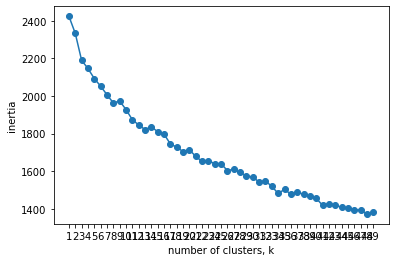

In [55]:
ks = range(1,50)

inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df_pca)
    inertias.append(model.inertia_)
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


In [56]:
df_pca

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca144,pca145,pca146,pca147,pca148,pca149,pca150,pca151,pca152,pca153
project_name,,,,,,,,,,,,,,,,,,,,,
freeCodeCamp/freeCodeCamp,1.210775,0.106974,0.012635,0.143893,0.224673,0.060492,-0.349272,0.122543,-0.306461,-0.361738,...,0.012189,0.041516,-0.010254,0.001017,-0.032682,-0.039537,0.008407,-0.006279,-0.062714,-0.023382
996icu/996.ICU,-0.161894,-0.114771,-0.060096,-0.120787,-0.034542,0.009631,-0.018483,-0.089426,-0.040670,0.020835,...,-0.001578,0.001137,-0.001950,0.000962,-0.004775,-0.004156,-0.000498,-0.001860,0.003031,-0.005449
EbookFoundation/free-programming-books,-0.108576,-0.086294,0.642277,0.520239,-0.154948,-0.068523,0.138540,-0.426992,-0.104871,0.018982,...,0.026273,-0.016659,0.003893,0.055273,0.041768,-0.016276,0.115432,-0.045407,-0.056714,0.045588
jwasham/coding-interview-university,-0.159393,0.061958,-0.124721,-0.071381,-0.109227,-0.483028,0.256569,0.500802,-0.755656,-0.166071,...,0.101437,-0.030145,0.024503,0.100080,0.086031,-0.162722,0.051534,0.010791,0.018943,0.031869
vuejs/vue,0.905285,0.104327,-0.121438,-0.146116,-0.030025,-0.185561,0.183709,-0.011238,0.327003,0.185877,...,0.010095,0.102224,0.017183,-0.044297,-0.053002,-0.036012,-0.076353,-0.067492,-0.042809,-0.058730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
visionmedia/superagent,-0.161894,-0.114771,-0.060096,-0.120787,-0.034542,0.009631,-0.018483,-0.089426,-0.040670,0.020835,...,-0.001578,0.001137,-0.001950,0.000962,-0.004775,-0.004156,-0.000498,-0.001860,0.003031,-0.005449
charlax/professional-programming,-0.158795,-0.102234,-0.115722,-0.062611,-0.066480,-0.083570,-0.019466,-0.020813,-0.187425,-0.007488,...,-0.084947,0.129497,0.011520,-0.171989,-0.038037,0.048987,-0.004752,0.096994,-0.011116,0.083381
oracle/graal,0.524475,0.931122,0.005470,-0.000481,-0.202644,-0.255755,0.629271,0.536302,-0.215128,0.018847,...,-0.022573,0.023059,-0.049112,0.016378,-0.030365,0.001980,0.009091,0.019873,0.016588,-0.080751
